1.653881927937758
1.556022641566628


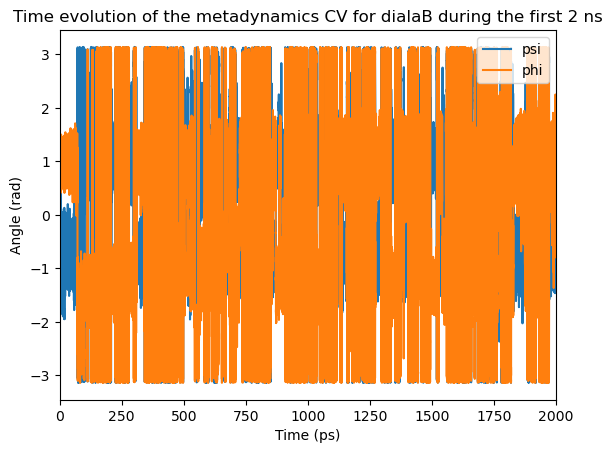

/state/partition1/job-26532567/ipykernel_1244427/2065280861.py:33: RuntimeWarning: divide by zero encountered in log
  H=-np.log(H)


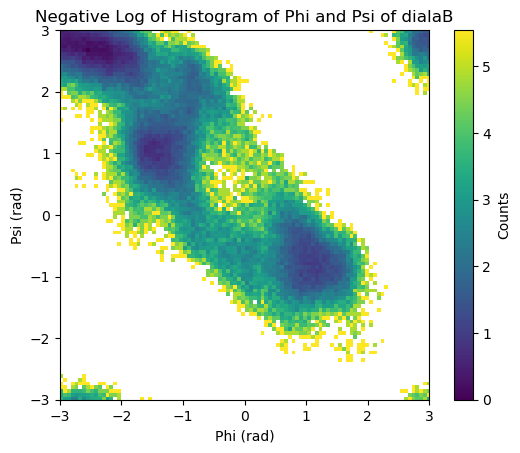

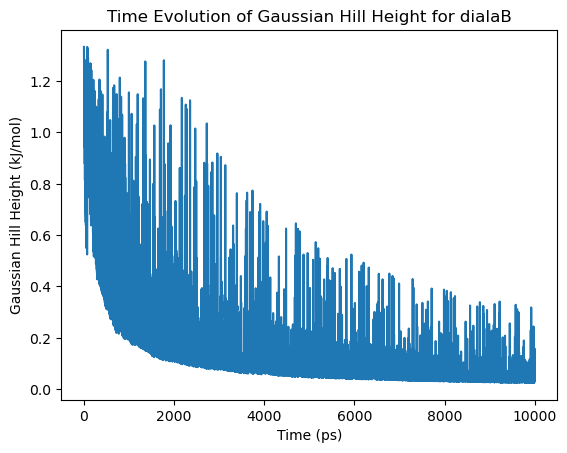

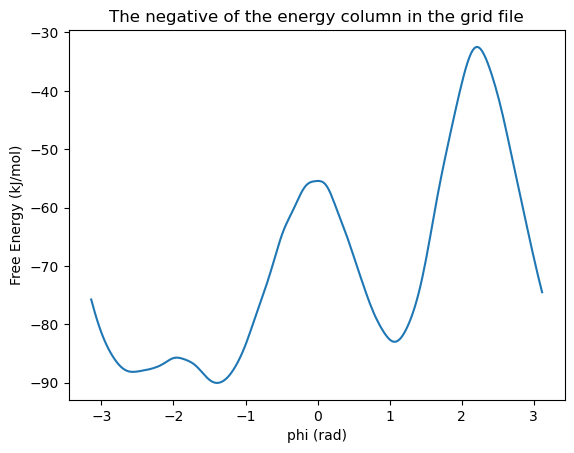

In [1]:
# this notebook is for plotting the end to end analysis and radius of gyration
import numpy as np
import pandas as pd
from pandas import read_csv
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt

#load mdtraj
import mdtraj as md
import os

#Read COLVAR file
dataA = pd.read_csv('./dialaB_metad_biasfactor10_pace500_height1.2_sigma0.13_10ns_COLVAR', header=None, delim_whitespace=True,skiprows=5)
A_phi_std = dataA[1].std()
print(A_phi_std)
A_psi_std= dataA[2].std()
print(A_psi_std)

#plot angle vs time
plt.plot(dataA[0][0:100001],dataA[2][0:100001],label="psi")
plt.plot(dataA[0][0:100001],dataA[1][0:100001],label="phi")
plt.legend(loc="upper right")
plt.xlabel('Time (ps)')
plt.ylabel('Angle (rad)')
plt.title('Time evolution of the metadynamics CV for dialaB during the first 2 ns')
plt.xlim([0,2000])
plt.savefig('Time evolution of the metadynamics CV for dialaB during the first 2 ns.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

# plot histogram of psi and phi
H, xedges, yedges = np.histogram2d(dataA[1][0:100001], dataA[2][0:100001], bins=100, normed=True)
H=H.T
H=-np.log(H)
H=H-H.min()
plt.imshow(H, interpolation='nearest', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xlabel('Phi (rad)')
plt.ylabel('Psi (rad)')
plt.title('Negative Log of Histogram of Phi and Psi of dialaB')
plt.xlim([-3,3])
plt.ylim([-3,3])
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
plt.savefig('Negative Log of Histogram of Phi and Psi of dialaB.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

hill_A = pd.read_csv('./dialaB_metad_biasfactor10_pace500_height1.2_sigma0.13_10ns_HILLS', header=None, delim_whitespace=True,skiprows=5)
plt.plot(hill_A[0],hill_A[3])
plt.xlabel('Time (ps)')
plt.ylabel('Gaussian Hill Height (kJ/mol)')
plt.title('Time Evolution of Gaussian Hill Height for dialaB')
plt.savefig('Time Evolution of Gaussian Hill Height for dialaB.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

grid_A=np.loadtxt("dialaB_metad_biasfactor10_pace500_height1.2_sigma0.13_10ns.grid.dat",skiprows=5)
plt.plot(grid_A[:,0],-1*grid_A[:,1])
plt.xlabel('phi (rad)')
plt.ylabel('Free Energy (kJ/mol)')
plt.title('The negative of the energy column in the grid file')
plt.savefig('The negative of the energy column in the grid file for dialaB.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

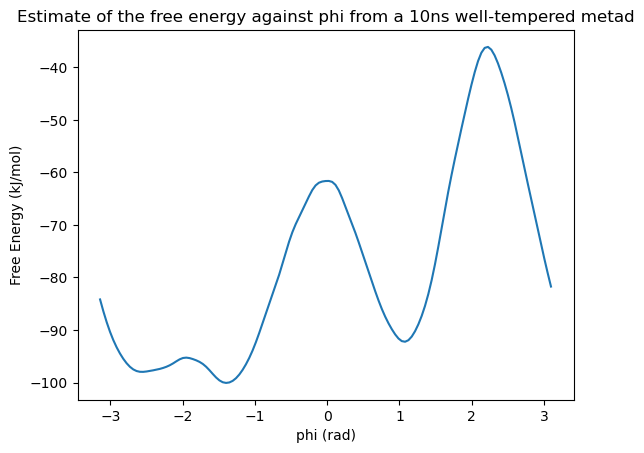

In [2]:
fes=np.loadtxt("fes.dat",skiprows=5)
plt.plot(fes[:,0],fes[:,1])
plt.xlabel('phi (rad)')
plt.ylabel('Free Energy (kJ/mol)')
plt.title('Estimate of the free energy against phi from a 10ns well-tempered metad')
plt.savefig('Estimate of the free energy against phi from a 10ns well-tempered metad for dialaB.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

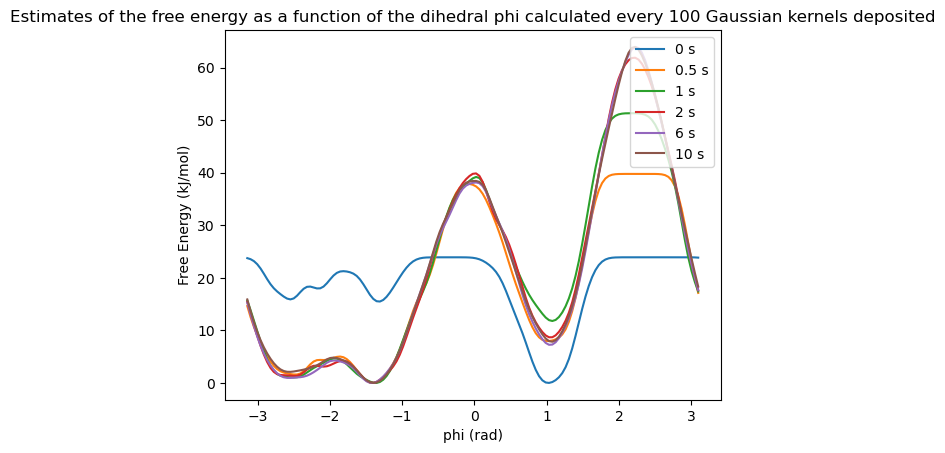

In [3]:
fes0=np.loadtxt("fes_0.dat",skiprows=5)
fes5=np.loadtxt("fes_5.dat",skiprows=5)
fes10=np.loadtxt("fes_10.dat",skiprows=5)
fes20=np.loadtxt("fes_20.dat",skiprows=5)
fes60=np.loadtxt("fes_60.dat",skiprows=5)
fes100=np.loadtxt("fes_100.dat",skiprows=5)
plt.plot(fes0[:,0],fes0[:,1],label="0 s")
plt.plot(fes5[:,0],fes5[:,1],label="0.5 s")
plt.plot(fes10[:,0],fes10[:,1],label="1 s")
plt.plot(fes20[:,0],fes20[:,1],label="2 s")
plt.plot(fes60[:,0],fes60[:,1],label="6 s")
plt.plot(fes100[:,0],fes100[:,1],label="10 s")
plt.legend(loc="upper right")
plt.xlabel('phi (rad)')
plt.ylabel('Free Energy (kJ/mol)')
plt.title('Estimates of the free energy as a function of the dihedral phi calculated every 100 Gaussian kernels deposited')
plt.savefig('Estimates of the free energy as a function of the dihedral phi calculated every 100 Gaussian kernels deposited for dialaB.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()